# Let's try using KNN Classifier for this classification problem

In [84]:
df = pd.read_excel("default of credit card clients.xls", header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [85]:
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)
df.drop('ID', axis=1, inplace=True)

In [87]:
df.drop(df[df.EDUCATION==0].index | df[df.MARRIAGE==0].index, inplace=True)

/home/sandeep/anaconda3/envs/my_env1/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  """Entry point for launching an IPython kernel.


In [88]:
df_no_default = df[df.DEFAULT==0]
df_default = df[df.DEFAULT==1]

In [89]:
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=6600, random_state=42)
df_default_downsampled = resample(df_default, replace=False, n_samples=6600, random_state=42)

In [90]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])

In [91]:
X = df_downsample.drop('DEFAULT', axis=1)
y = df_downsample.DEFAULT

In [92]:
X_encoded = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 
                                        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train) # sklearn scale will scale the data to mean 0 and SD 1
X_test_scaled = scale(X_test)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

In [102]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1033  635]
 [ 578 1054]]
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      1668
           1       0.62      0.65      0.63      1632

    accuracy                           0.63      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.63      0.63      0.63      3300



In [103]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

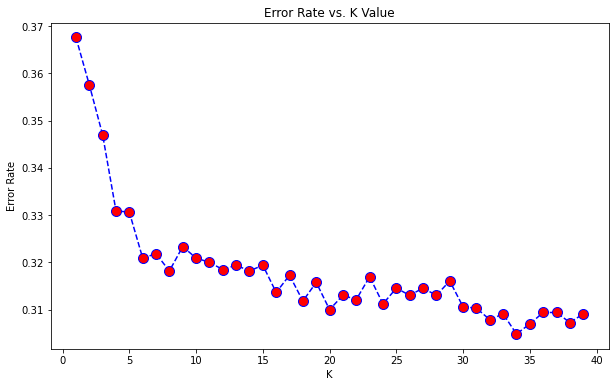

In [104]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [105]:
# NOW WITH K=34
knn = KNeighborsClassifier(n_neighbors=34)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=34')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=34


[[1346  322]
 [ 684  948]]


              precision    recall  f1-score   support

           0       0.66      0.81      0.73      1668
           1       0.75      0.58      0.65      1632

    accuracy                           0.70      3300
   macro avg       0.70      0.69      0.69      3300
weighted avg       0.70      0.70      0.69      3300



In [106]:
error_rate = []

# Will take some time
for i in range(25,70):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

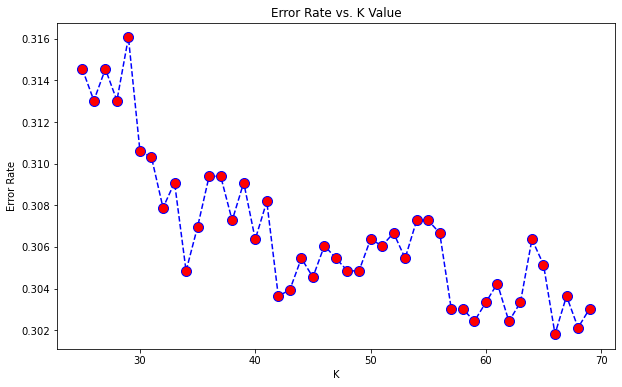

In [107]:
plt.figure(figsize=(10,6))
plt.plot(range(25,70),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [108]:
# NOW WITH K=66
knn = KNeighborsClassifier(n_neighbors=66)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=66')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=66


[[1364  304]
 [ 692  940]]


              precision    recall  f1-score   support

           0       0.66      0.82      0.73      1668
           1       0.76      0.58      0.65      1632

    accuracy                           0.70      3300
   macro avg       0.71      0.70      0.69      3300
weighted avg       0.71      0.70      0.69      3300

